# Predicting Restaurant Food Cost

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset.
train_df = pd.read_excel('Res_Data_Train.xlsx')
test_df = pd.read_excel('Res_Data_Test.xlsx')

In [3]:
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
test_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
train_df.shape

(12690, 9)

In [6]:
test_df.shape

(4231, 8)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [9]:
# percentage of missing values in the train dataframe
train_df.isna().mean()*100

TITLE            0.000000
RESTAURANT_ID    0.000000
CUISINES         0.000000
TIME             0.000000
CITY             0.882585
LOCALITY         0.772262
RATING           0.015760
VOTES            9.487786
COST             0.000000
dtype: float64

In [10]:
# percentage of missing values in the test dataframe
test_df.isna().mean()*100

TITLE            0.000000
RESTAURANT_ID    0.000000
CUISINES         0.000000
TIME             0.000000
CITY             0.827228
LOCALITY         0.709052
RATING           0.047270
VOTES            9.501300
dtype: float64

In [11]:
# Merging both the test and train dataset
df = pd.concat([train_df,test_df])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [13]:
# percentage of missing values in the full dataframe
df.isna().mean()*100

TITLE             0.000000
RESTAURANT_ID     0.000000
CUISINES          0.000000
TIME              0.000000
CITY              0.868743
LOCALITY          0.756456
RATING            0.023639
VOTES             9.491165
COST             25.004432
dtype: float64

We can see that there are missing values in 5 features

# EDA

In [14]:
df.duplicated().sum()

26

In [15]:
df= df.drop_duplicates()

In [16]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [17]:
df.TITLE.nunique()

123

In [18]:
# The Title feature has 123 unique values so we will group then by binning

In [19]:
dining_title = df[df.TITLE.str.contains('DINING')].TITLE.value_counts().index

In [20]:
dining_title.nunique()

33

In [21]:
# Creating a copy of the database for data cleaning
df_clean = df.copy()

In [22]:
df_clean.TITLE.replace(to_replace=dining_title,value='CASUAL DINING',inplace=True)

In [23]:
df_clean.TITLE.value_counts()

CASUAL DINING                6323
QUICK BITES                  5627
None                         1284
CAFÉ                          829
DESSERT PARLOR                507
                             ... 
KIOSK,FOOD COURT                1
CONFECTIONERY,QUICK BITES       1
BAKERY,FOOD COURT               1
CAFÉ,FOOD COURT                 1
IRANI CAFE,BAKERY               1
Name: TITLE, Length: 91, dtype: int64

In [24]:
quick_bites_title = df_clean[df_clean.TITLE.str.contains('BITES')].TITLE.value_counts().index

In [25]:
quick_bites_title

Index(['QUICK BITES', 'BAKERY,QUICK BITES', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,QUICK BITES', 'QUICK BITES,SWEET SHOP',
       'BEVERAGE SHOP,QUICK BITES', 'QUICK BITES,DESSERT PARLOR',
       'CAFÉ,QUICK BITES', 'QUICK BITES,BAKERY', 'QUICK BITES,BEVERAGE SHOP',
       'FOOD COURT,QUICK BITES', 'QUICK BITES,FOOD COURT', 'QUICK BITES,CAFÉ',
       'QUICK BITES,KIOSK', 'KIOSK,QUICK BITES', 'MEAT SHOP,QUICK BITES',
       'CONFECTIONERY,QUICK BITES', 'QUICK BITES,MEAT SHOP',
       'QUICK BITES,FOOD TRUCK', 'QUICK BITES,BAR'],
      dtype='object')

In [26]:
df_clean.TITLE.replace(to_replace=quick_bites_title,value='QUICK BITES',inplace=True)

In [27]:
df_clean[df_clean.TITLE.str.contains('CAF')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600.0
24,CAFÉ,2389,"Cafe, Italian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,4.2,493 votes,700.0
31,CAFÉ,2802,"Cafe, Tea","8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)",Gurgaon,DLF Cyber City,4.0,546 votes,500.0
32,CAFÉ,7836,"Cafe, Continental, European, American, Healthy...",10am – 12midnight (Mon-Sun),Andheri West,Versova,4.0,2228 votes,1200.0
37,CAFÉ,4455,"Cafe, Healthy Food",8:30am – 11pm (Mon-Sun),Bangalore,MG Road,4.3,69 votes,800.0
...,...,...,...,...,...,...,...,...,...
4127,CAFÉ,6653,"Cafe, Continental, Italian, Salad",11am – 11pm (Mon-Sun),New Delhi,Shahpur Jat,4.1,1114 votes,NaN
4176,CAFÉ,1499,"Cafe, Italian, Continental",11:30am – 11:30pm (Mon-Sun),Bangalore,Sahakara Nagar,3.9,241 votes,NaN
4183,CAFÉ,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),Noida,Sector 63,NEW,NaN,NaN
4187,CAFÉ,2561,Cafe,11am – 11pm (Mon-Sun),Bangalore,Jalahalli,3.9,104 votes,NaN


In [28]:
df_clean[df_clean.TITLE.str.contains('CAF')].TITLE.value_counts()

CAFÉ                   829
CAFÉ,BAKERY             43
CAFÉ,DESSERT PARLOR     38
CAFÉ,BAR                23
BAKERY,CAFÉ             18
DESSERT PARLOR,CAFÉ     12
BEVERAGE SHOP,CAFÉ       4
CAFÉ,BEVERAGE SHOP       4
BAR,CAFÉ                 4
LOUNGE,CAFÉ              2
CAFÉ,LOUNGE              2
PUB,CAFÉ                 2
CAFÉ,FOOD COURT          1
IRANI CAFE,BAKERY        1
Name: TITLE, dtype: int64

In [29]:
cafe_title = df_clean[df_clean.TITLE.str.contains('CAF')].TITLE.value_counts().index

In [30]:
df_clean.TITLE.replace(to_replace=cafe_title,value='CAFE',inplace=True)

In [31]:
df_clean[df_clean.TITLE.str.contains('DESSERT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
49,DESSERT PARLOR,3378,"Ice Cream, Desserts","11am – 11pm (Mon, Tue, Wed, Thu, Sun), 11am –...",Bangalore,Whitefield,4.3,518 votes,400.0
64,"BEVERAGE SHOP,DESSERT PARLOR",8750,"Beverages, Desserts",12noon – 12:30AM (Mon-Sun),Mumbai,Mazgaon,3.7,69 votes,300.0
75,"DESSERT PARLOR,SWEET SHOP",8155,"Desserts, Mithai",8:30am – 10pm (Mon-Sun),Hyderabad,Dilsukhnagar,3.5,101 votes,200.0
82,"BAKERY,DESSERT PARLOR",5684,"Bakery, Desserts, Healthy Food",10am – 8pm (Mon-Sun),Bandra West,Pali Hill,4.0,545 votes,500.0
...,...,...,...,...,...,...,...,...,...
4042,DESSERT PARLOR,13914,"Ice Cream, Desserts",11am – 11pm (Mon-Sun),Kochi,Marine Drive,3.4,9 votes,NaN
4114,DESSERT PARLOR,9479,Ice Cream,10am – 11pm (Mon-Sun),Hyderabad,Saroor Nagar,3.6,69 votes,NaN
4166,DESSERT PARLOR,5113,"Ice Cream, Beverages",12noon – 12midnight (Mon-Sun),Gurgaon,DLF Phase 4,4.0,349 votes,NaN
4177,DESSERT PARLOR,5425,Desserts,10:30am – 12:30AM (Mon-Sun),Opposite Ellora Building,Off Carter Road,4.2,1236 votes,NaN


In [32]:
dessert_title = df_clean[df_clean.TITLE.str.contains('DESSERT')].TITLE.value_counts().index

In [33]:
df_clean.TITLE.replace(to_replace=dessert_title,value='DESSERT PARLOUR',inplace=True)

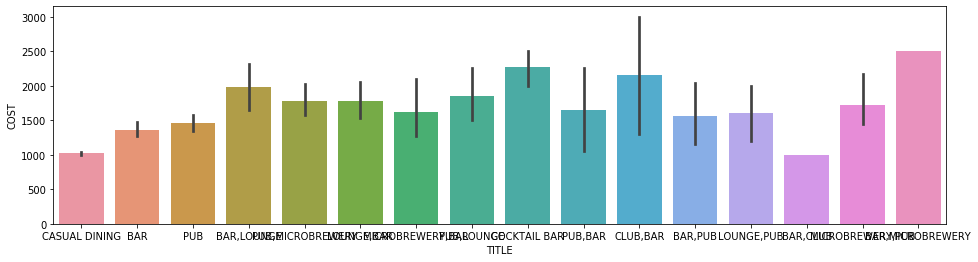

In [34]:
plt.figure(figsize=(16,4))
sns.barplot(x='TITLE',y='COST',data=df_clean[df_clean.TITLE.str.contains('PUB|BAR|CASUAL DINING')])

In [35]:
df_clean[df_clean.TITLE.str.contains('PUB|BAR')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
28,BAR,4222,"Finger Food, North Indian, Continental, Italian",11am – 11pm (Mon-Sun),Chennai,Neelangarai,4.3,150 votes,1000.0
29,PUB,6577,"Finger Food, Continental, Asian, North Indian",12:30pm – 1am (Mon-Sun),Bangalore,Koramangala 5th Block,4.2,2456 votes,1400.0
99,BAR,13495,"North Indian, Chinese","11am – 12midnight (Mon-Thu),11am – 1am (Fri-Sun)",Bangalore,Koramangala 1st Block,3.7,23 votes,800.0
125,"BAR,LOUNGE",4214,"Italian, Continental, Chinese, American",12noon – 1am (Mon-Sun),New Delhi,Connaught Place,4.3,1293 votes,1600.0
280,BAR,2982,"North Indian, Chinese, Andhra",12:30pm – 11pm (Mon-Sun),Hyderabad,Kothapet,3.6,510 votes,1000.0
...,...,...,...,...,...,...,...,...,...
4034,PUB,15434,"Finger Food, Chinese, South Indian, Bar Food",11am – 12midnight (Mon-Sun),Chennai,Pallikaranai,3.8,68 votes,NaN
4070,BAR,7634,"Italian, North Indian, Continental",5pm – 12midnight (Mon-Sun),Chennai,Nungambakkam,4.0,92 votes,NaN
4116,"PUB,BAR",10286,"Arabian, Lebanese, North Indian, Kebab, Iranian",12:30pm – 1am (Mon-Sun),Gurgaon,DLF Cyber City,4.2,1294 votes,NaN
4151,"PUB,MICROBREWERY",8402,"Finger Food, American, Continental, North Indi...",1pm – 1am (Mon-Sun),Gurgaon,Golf Course Road,4.6,4064 votes,NaN


In [36]:
bar_title = df_clean[df_clean.TITLE.str.contains('BAR|PUB')].TITLE.value_counts().index

In [37]:
df_clean.TITLE.replace(to_replace=bar_title,value='BAR_PUB',inplace=True)

In [38]:
df_clean.TITLE.value_counts()

CASUAL DINING               6323
QUICK BITES                 6131
None                        1284
CAFE                         983
DESSERT PARLOUR              650
BAKERY                       391
BAR_PUB                      300
BEVERAGE SHOP                215
LOUNGE                       135
FOOD COURT                   110
KIOSK                         73
MESS                          68
SWEET SHOP                    67
DHABA                         61
FOOD TRUCK                    37
CLUB                          26
MICROBREWERY                  12
PAAN SHOP                      5
CONFECTIONERY                  3
LOUNGE,CLUB                    3
BAKERY,BEVERAGE SHOP           2
LOUNGE,MICROBREWERY            2
SWEET SHOP,BAKERY              2
BAKERY,SWEET SHOP              2
BEVERAGE SHOP,FOOD COURT       1
CLUB,MICROBREWERY              1
BAKERY,FOOD COURT              1
BAKERY,CONFECTIONERY           1
KIOSK,FOOD COURT               1
BHOJANALYA                     1
SWEET SHOP

In [39]:
# Grouping as per the BEVERAGE

In [40]:
bev_title = df_clean[df_clean.TITLE.str.contains('BEVERAGE')].TITLE.value_counts().index

In [41]:
df_clean.TITLE.replace(to_replace=bev_title,value='BEVERAGE SHOP',inplace=True)

In [42]:
df_clean.TITLE.value_counts()

CASUAL DINING               6323
QUICK BITES                 6131
None                        1284
CAFE                         983
DESSERT PARLOUR              650
BAKERY                       391
BAR_PUB                      300
BEVERAGE SHOP                219
LOUNGE                       135
FOOD COURT                   110
KIOSK                         73
MESS                          68
SWEET SHOP                    67
DHABA                         61
FOOD TRUCK                    37
CLUB                          26
MICROBREWERY                  12
PAAN SHOP                      5
LOUNGE,CLUB                    3
CONFECTIONERY                  3
SWEET SHOP,BAKERY              2
BAKERY,SWEET SHOP              2
LOUNGE,MICROBREWERY            2
BAKERY,CONFECTIONERY           1
BAKERY,FOOD COURT              1
BHOJANALYA                     1
CLUB,MICROBREWERY              1
MICROBREWERY,LOUNGE            1
KIOSK,FOOD COURT               1
MEAT SHOP                      1
SWEET SHOP

In [43]:
# Bakery and Confectionery and Sweet Shop

In [44]:
df_clean[df_clean.TITLE.str.contains('BAKERY|CONFECTIONERY|SWEET SHOP')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
76,BAKERY,2646,"Bakery, Desserts",10am – 1am (Mon-Sun),Hyderabad,Gachibowli,3.1,145 votes,300.0
100,BAKERY,4933,"Bakery, Desserts",9am – 11pm (Mon-Sun),Chennai,Anna Nagar East,3.8,66 votes,400.0
108,BAKERY,7776,"Bakery, Desserts, Beverages",7am – 12midnight (Mon-Sun),Bangalore,BTM,4.0,17 votes,450.0
124,BAKERY,2633,"Bakery, Desserts",9am – 12midnight (Mon-Sun),Mumbai,Jogeshwari,3.3,6 votes,400.0
149,BAKERY,2641,Bakery,10am – 11pm (Mon-Sun),Madhuranagar,Behind Allahabad Bank,3.5,32 votes,300.0
...,...,...,...,...,...,...,...,...,...
4157,SWEET SHOP,6789,"Mithai, Street Food","8am – 11:30pm (Mon),9:30am – 10pm (Tue-Sun)",Mumbai,Chembur,4.2,224 votes,NaN
4178,BAKERY,12905,"Bakery, Desserts",8am – 9pm (Mon-Sun),Kochi,Tripunithura,3.4,10 votes,NaN
4186,BAKERY,13622,"Bakery, Desserts",7am – 12midnight (Mon-Sun),Mumbai,Mira Road,4.2,598 votes,NaN
4204,BAKERY,15219,Bakery,10am – 10pm (Mon-Sun),Chennai,Perungudi,3.2,31 votes,NaN


In [45]:
bakery_title = df_clean[df_clean.TITLE.str.contains('BAKERY|CONFECTIONERY|SWEET SHOP')].TITLE.value_counts().index

In [46]:
df_clean.TITLE.replace(to_replace=bakery_title,value='BAKERY_SWEETS',inplace=True)

In [47]:
df_clean.TITLE.value_counts()

CASUAL DINING          6323
QUICK BITES            6131
None                   1284
CAFE                    983
DESSERT PARLOUR         650
BAKERY_SWEETS           468
BAR_PUB                 300
BEVERAGE SHOP           219
LOUNGE                  135
FOOD COURT              110
KIOSK                    73
MESS                     68
DHABA                    61
FOOD TRUCK               37
CLUB                     26
MICROBREWERY             12
PAAN SHOP                 5
LOUNGE,CLUB               3
LOUNGE,MICROBREWERY       2
MICROBREWERY,LOUNGE       1
BHOJANALYA                1
MEAT SHOP                 1
CLUB,MICROBREWERY         1
KIOSK,FOOD COURT          1
Name: TITLE, dtype: int64

In [48]:
# Combinig MICROBRWERY, LOUNGE and CLUBS as they have similar data

In [49]:
df_clean[df_clean.TITLE.str.contains('MICROBREWERY|LOUNGE|CLUB')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600.0
147,LOUNGE,12989,"Continental, North Indian, Chinese, Finger Food",12noon – 12midnight (Mon-Sun),New Delhi,Rajouri Garden,4.2,481 votes,1100.0
171,LOUNGE,14908,"Pizza, Continental",5pm – 12midnight (Mon-Sun),Chennai,Ramapuram,3.9,71 votes,1200.0
195,LOUNGE,6827,"North Indian, Chinese, Continental, Italian",11am – 1am (Mon-Sun),New Delhi,Vijay Nagar,4.3,361 votes,1000.0
304,MICROBREWERY,10512,"Bar Food, Modern Indian",12:30pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,4635 votes,1500.0
...,...,...,...,...,...,...,...,...,...
3817,LOUNGE,2062,"Continental, Steak",10:30am – 1am (Mon-Sun),Bangalore,Indiranagar,4.1,606 votes,NaN
3926,MICROBREWERY,87,"Continental, Mexican, Beverages, Italian, Nort...",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,4.4,2585 votes,NaN
4011,LOUNGE,14578,"Continental, Chinese, Mughlai, Finger Food, No...",11:30am – 12midnight (Mon-Sun),Mumbai,Powai,4.1,735 votes,NaN
4014,LOUNGE,1135,"North Indian, Chinese, Italian, Continental",11am – 12:30AM (Mon-Sun),New Delhi,Dwarka,4.7,120 votes,NaN


In [50]:
lounge_title = df_clean[df_clean.TITLE.str.contains('MICROBREWERY|LOUNGE|CLUB')].TITLE.value_counts().index

In [51]:
df_clean.TITLE.replace(to_replace=lounge_title,value='LOUNGE_CLUB_MICROBREWERY',inplace=True)

In [52]:
df_clean.TITLE.value_counts()

CASUAL DINING               6323
QUICK BITES                 6131
None                        1284
CAFE                         983
DESSERT PARLOUR              650
BAKERY_SWEETS                468
BAR_PUB                      300
BEVERAGE SHOP                219
LOUNGE_CLUB_MICROBREWERY     180
FOOD COURT                   110
KIOSK                         73
MESS                          68
DHABA                         61
FOOD TRUCK                    37
PAAN SHOP                      5
MEAT SHOP                      1
KIOSK,FOOD COURT               1
BHOJANALYA                     1
Name: TITLE, dtype: int64

In [53]:
# Combining Food Court, Food Truck and KIOSK

In [54]:
food_court_title = df_clean[df_clean.TITLE.str.contains('FOOD COURT|FOOD TRUCK|KIOSK')].TITLE.value_counts().index

In [55]:
df_clean.TITLE.replace(to_replace=food_court_title,value='FOOD_COURT_TRUCK',inplace=True)

In [56]:
df_clean.TITLE.value_counts()

CASUAL DINING               6323
QUICK BITES                 6131
None                        1284
CAFE                         983
DESSERT PARLOUR              650
BAKERY_SWEETS                468
BAR_PUB                      300
FOOD_COURT_TRUCK             221
BEVERAGE SHOP                219
LOUNGE_CLUB_MICROBREWERY     180
MESS                          68
DHABA                         61
PAAN SHOP                      5
BHOJANALYA                     1
MEAT SHOP                      1
Name: TITLE, dtype: int64

In [57]:
# Combining DHABA, BHOJANALYA and MESS

In [58]:
dhaba_title = df_clean[df_clean.TITLE.str.contains('MESS|DHABA|BHOJANALYA')].TITLE.value_counts().index

In [59]:
df_clean.TITLE.replace(to_replace=dhaba_title,value='DHABA_MESS',inplace=True)

In [60]:
df_clean.TITLE.value_counts()

CASUAL DINING               6323
QUICK BITES                 6131
None                        1284
CAFE                         983
DESSERT PARLOUR              650
BAKERY_SWEETS                468
BAR_PUB                      300
FOOD_COURT_TRUCK             221
BEVERAGE SHOP                219
LOUNGE_CLUB_MICROBREWERY     180
DHABA_MESS                   130
PAAN SHOP                      5
MEAT SHOP                      1
Name: TITLE, dtype: int64

we can see that the PAAN SHOP and MEAT SHOP have very few values so we will eliminate MEAT SHOP

In [61]:
df_clean[df_clean.TITLE.str.contains('PAAN SHOP')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
4653,PAAN SHOP,7823,Paan,11am – 11pm (Mon-Sun),Powai,Lake Homes & Hiranandani Gardens,4.0,80 votes,150.0
8856,PAAN SHOP,10036,Paan,10am – 11pm (Mon-Sun),New Delhi,Connaught Place,4.5,334 votes,100.0
9813,PAAN SHOP,14524,Paan,12:30pm – 12:30AM (Mon-Sun),Mumbai,Girgaum,3.3,9 votes,100.0
11105,PAAN SHOP,8534,Paan,"11:30am – 11:30pm (Mon-Fri),11:30am – 12midnig...",Bangalore,BTM,-,NaN,100.0
2768,PAAN SHOP,14524,Paan,12:30pm – 12:30AM (Mon-Sun),Mumbai,Girgaum,3.3,9 votes,NaN


In [62]:
paan_title = df_clean[df_clean.TITLE.str.contains('PAAN')].TITLE.value_counts().index

In [63]:
# Merging PAAN in FOOD_COURT_TRUCK
df_clean.TITLE.replace(to_replace=paan_title,value='FOOD_COURT_TRUCK',inplace=True)

In [64]:
df_clean = df_clean[df_clean.TITLE != 'MEAT SHOP']

In [65]:
df_clean.TITLE.value_counts()

CASUAL DINING               6323
QUICK BITES                 6131
None                        1284
CAFE                         983
DESSERT PARLOUR              650
BAKERY_SWEETS                468
BAR_PUB                      300
FOOD_COURT_TRUCK             226
BEVERAGE SHOP                219
LOUNGE_CLUB_MICROBREWERY     180
DHABA_MESS                   130
Name: TITLE, dtype: int64

As we see the TITTLE has been grouped however we have 1287 values as None

In [66]:
# Replacing the None values with NaN
df_clean.TITLE.replace('None',np.nan,inplace=True)

In [67]:
# 257

In [68]:
# We will work on CUISINES feature
df.CUISINES.value_counts()

North Indian                           714
North Indian, Chinese                  713
South Indian                           706
Fast Food                              364
Chinese                                226
                                      ... 
Kerala, Arabian, Biryani                 1
American, Continental, Steak             1
Coffee, Fast Food                        1
South Indian, North Indian, Italian      1
Fast Food, Continental, Italian          1
Name: CUISINES, Length: 5183, dtype: int64

In [69]:
df.CUISINES.nunique()
# As we can see that there are 5183 unique values so we need to group them by binning

5183

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
tf1 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_cuisine = tf1.fit_transform(df_clean.CUISINES)
df_cuisine = pd.DataFrame(data=df_cuisine.toarray(), columns=tf1.get_feature_names())

In [72]:
# Grouping by North Indian cuisine
df_clean[df_clean.CUISINES.str.contains('North Indian')].CUISINES


0                         Malwani, Goan, North Indian
2          North Indian, Chinese, Biryani, Hyderabadi
5             North Indian, Chinese, Seafood, Biryani
6          Cafe, Chinese, Pizza, North Indian, Burger
8                          South Indian, North Indian
                            ...                      
4222             North Indian, Chinese, Kebab, Juices
4225                   North Indian, Mughlai, Chinese
4226                   North Indian, Mughlai, Chinese
4227    Biryani, North Indian, Sandwich, Salad, Wraps
4228                        Continental, North Indian
Name: CUISINES, Length: 7210, dtype: object

In [73]:
df_clean['n_indian_cuisine'] = df_clean.CUISINES.mask(df_clean.CUISINES.str.contains('North Indian'),1)
df_clean['n_indian_cuisine'] = df_clean['n_indian_cuisine'].mask(~df_clean.CUISINES.str.contains('North Indian'),0)

In [74]:
df_clean

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,1
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,1
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,0
...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,1
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,1
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,1
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,0


In [75]:
# Grouping by South Indian cuisine
df_clean[df_clean.CUISINES.str.contains('South Indian')].CUISINES

8                              South Indian, North Indian
13                                           South Indian
30                             South Indian, North Indian
33                    South Indian, North Indian, Chinese
40                    North Indian, South Indian, Chinese
                              ...                        
4207                  South Indian, North Indian, Chinese
4213                  North Indian, South Indian, Chinese
4214                Fast Food, North Indian, South Indian
4220    South Indian, North Indian, Fast Food, Chinese...
4224                                 Kerala, South Indian
Name: CUISINES, Length: 3032, dtype: object

In [76]:
df_clean['s_indian_cuisine'] = df_clean.CUISINES.mask(df_clean.CUISINES.str.contains('South Indian'),1)
df_clean['s_indian_cuisine'] = df_clean['s_indian_cuisine'].mask(~df_clean.CUISINES.str.contains('South Indian'),0)

In [77]:
df_clean.s_indian_cuisine.value_counts()

0    13862
1     3032
Name: s_indian_cuisine, dtype: int64

In [78]:
# Grouping by Chinese cuisine
df_clean[df_clean.CUISINES.str.contains('Chinese')].CUISINES

2              North Indian, Chinese, Biryani, Hyderabadi
3                                        Tibetan, Chinese
5                 North Indian, Chinese, Seafood, Biryani
6              Cafe, Chinese, Pizza, North Indian, Burger
10              North Indian, Chinese, Fast Food, Biryani
                              ...                        
4220    South Indian, North Indian, Fast Food, Chinese...
4221                       North Indian, Mughlai, Chinese
4222                 North Indian, Chinese, Kebab, Juices
4225                       North Indian, Mughlai, Chinese
4226                       North Indian, Mughlai, Chinese
Name: CUISINES, Length: 5842, dtype: object

In [79]:
df_clean['chinese_cuisine'] = df_clean.CUISINES.mask(df_clean.CUISINES.str.contains('Chinese'),1)
df_clean['chinese_cuisine'] = df_clean['chinese_cuisine'].mask(~df_clean.CUISINES.str.contains('Chinese'),0)

In [80]:
df_clean.chinese_cuisine.value_counts()

0    11052
1     5842
Name: chinese_cuisine, dtype: int64

In [81]:
# Grouoping by Bakery and Icecream and Desserts
df_clean[df_clean.CUISINES.str.contains('Desserts|Ice Cream|Bakery')].CUISINES

4                          Desserts
19         Bakery, Fast Food, Momos
49              Ice Cream, Desserts
64              Beverages, Desserts
75                 Desserts, Mithai
                   ...             
4197    Bakery, Fast Food, Desserts
4204                         Bakery
4205               Bakery, Desserts
4211     Fast Food, Bakery, Chinese
4215            Ice Cream, Desserts
Name: CUISINES, Length: 2103, dtype: object

In [82]:
df_clean['bakery_desserts_cuisine'] = df_clean.CUISINES.mask(df_clean.CUISINES.str.contains('Desserts|Ice Cream|Bakery'),1)
df_clean['bakery_desserts_cuisine'] = df_clean['bakery_desserts_cuisine'].mask(~df_clean.CUISINES.str.contains('Desserts|Ice Cream|Bakery'),0)

In [83]:
df_clean.bakery_desserts_cuisine.value_counts()

0    14791
1     2103
Name: bakery_desserts_cuisine, dtype: int64

In [84]:
# Grouping by Fast Foods and Snacks
df_clean[df_clean.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo')].CUISINES

6              Cafe, Chinese, Pizza, North Indian, Burger
10              North Indian, Chinese, Fast Food, Biryani
11                           Fast Food, Burger, Beverages
16                                North Indian, Fast Food
19                               Bakery, Fast Food, Momos
                              ...                        
4211                           Fast Food, Bakery, Chinese
4214                Fast Food, North Indian, South Indian
4220    South Indian, North Indian, Fast Food, Chinese...
4223                                  Sindhi, Street Food
4229                                     Rolls, Beverages
Name: CUISINES, Length: 5163, dtype: object

In [85]:
df_clean['fast_food_cuisine'] = df_clean.CUISINES.mask(df_clean.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'),1)
df_clean['fast_food_cuisine'] = df_clean['fast_food_cuisine'].mask(~df_clean.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'),0)

In [86]:
df_clean.fast_food_cuisine.value_counts()

0    11731
1     5163
Name: fast_food_cuisine, dtype: int64

In [87]:
# Grouping by States
indian_states = 'Andhra Pradesh,Arunachal Pradesh ,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar Islands,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Lakshadweep,National Capital Territory of Delhi,Puducherry'.replace(',','|')

In [88]:
df_clean[df_clean.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states))].CUISINES

0                             Malwani, Goan, North Indian
2              North Indian, Chinese, Biryani, Hyderabadi
5                 North Indian, Chinese, Seafood, Biryani
10              North Indian, Chinese, Fast Food, Biryani
14                                          Maharashtrian
                              ...                        
4172                        North Indian, Chinese, Kerala
4191                                               Kerala
4209    Biryani, Chinese, Mughlai, North Indian, Hyder...
4218                                North Indian, Biryani
4224                                 Kerala, South Indian
Name: CUISINES, Length: 1724, dtype: object

In [89]:
df_clean['regional_cuisine'] = df_clean.CUISINES.mask(df_clean.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)),1)
df_clean['regional_cuisine'] = df_clean['regional_cuisine'].mask(~df_clean.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)),0)

In [90]:
df_clean.regional_cuisine.value_counts()

0    15170
1     1724
Name: regional_cuisine, dtype: int64

In [91]:
# Grouping by Beverages and Cafe and Juices
df_clean[df_clean.CUISINES.str.contains('Beverage|Cafe|Juices')].CUISINES

6              Cafe, Chinese, Pizza, North Indian, Burger
11                           Fast Food, Burger, Beverages
24                                 Cafe, Italian, Chinese
31                                              Cafe, Tea
32      Cafe, Continental, European, American, Healthy...
                              ...                        
4187                                                 Cafe
4188                                      Cafe, Fast Food
4220    South Indian, North Indian, Fast Food, Chinese...
4222                 North Indian, Chinese, Kebab, Juices
4229                                     Rolls, Beverages
Name: CUISINES, Length: 2416, dtype: object

In [92]:
df_clean['beverage_cuisine'] = df_clean.CUISINES.mask(df_clean.CUISINES.str.contains('Beverage|Cafe|Juices'),1)
df_clean['beverage_cuisine'] = df_clean['beverage_cuisine'].mask(~df_clean.CUISINES.str.contains('Beverage|Cafe|Juices'),0)

In [93]:
# Grouping the remaining as Non Indian
df_clean[df_clean.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese')].CUISINES

1                Asian, Modern Indian, Japanese
5       North Indian, Chinese, Seafood, Biryani
12                             Arabian, Mughlai
20                        Continental, European
24                       Cafe, Italian, Chinese
                         ...                   
4198                                Continental
4206        European, Continental, North Indian
4216             Chinese, North Indian, Arabian
4217    European, Mediterranean, Italian, Sushi
4228                  Continental, North Indian
Name: CUISINES, Length: 4619, dtype: object

In [94]:
df_clean['non_indian_cuisine'] = df_clean.CUISINES.mask(df_clean.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'),1)
df_clean['non_indian_cuisine'] = df_clean['non_indian_cuisine'].mask(~df_clean.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'),0)

In [95]:
df_clean.CUISINES.nunique()

5183

In [96]:
df_clean

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,1,0,0,0,0,1,0,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,0,0,0,0,0,0,0,1
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,1,0,1,0,0,1,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,1,0,1,0,0,0,0,0
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,1,0,0,0,0,0,0,0
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,1,0,0,0,0,0,0,1
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,0,0,0,0,1,0,1,0


In [97]:
df_clean.drop(columns='TIME',inplace=True)

In [99]:
# Working on city feature
df_clean.CITY.nunique()

450

In [100]:
top10_cities = ['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi',
       'Gurgaon', 'Noida', 'Ghaziabad', 'Thane']

In [101]:
df_temp = df_clean.copy()
for city in top10_cities:
    print(city)
    temp_city = df_clean[df_clean.CITY.str.contains(city,na=False)].CITY.value_counts().index
    print(temp_city)
    # mapper
    df_clean.CITY.replace(to_replace=temp_city,value=city,inplace=True)

Chennai
Index(['Chennai', 'Chennai.', 'Chennai Teynampet', 'Chennai Mahabalipuram',
       'Chennai 600034.', 'Sholinganallur. Chennai', 'Chennai Perungudi',
       'Mogappair. Chennai', 'Chennai- 600107',
       'Chennai. (Near Hotel Matshya)', 'Chennai (Above Bombay Brasserie)',
       'Chennai Opposite 5C Bus stand', 'Chennai (Bang Opposite Indian Bank)',
       'Chennai Thousand Lights', 'Balavinayagar Nagar Chennai',
       'Chennai Chrompet', 'Chennai 600040', 'Chennai 40', 'Chennai - 600018',
       'Chennai Padur', 'Chennai - 600040', 'T-Nagar Chennai',
       'Chennai Kovalam', 'Chennai Injambakkam', 'Chennai 37',
       'Chennai Thuraipakkam', 'ECR NEELANKARAI Chennai 600115',
       'Chennai opp: Vasanth & co',
       'Chennai - 34 Landmark - Near Loyola College', 'Chennai Velachery',
       'Chennai-600008', 'Chennai-40'],
      dtype='object')
Bangalore
Index(['Bangalore', 'Bangalore.', 'BTM Bangalore',
       'Banaswadi (Next to Indian Bank) Bangalore',
       'Bangalore 

In [102]:
other_cities = df_clean[~df_clean.CITY.str.contains('Chennai|Bangalore|Hyderabad|Mumbai|New Delhi|Kochi|Gurgaon|Noida|Ghaziabad|Thane',na=False)].CITY.value_counts().index

In [103]:
other_cities

Index(['Secunderabad', 'Faridabad', 'Bandra West', 'Andheri West', 'Bengaluru',
       'India', 'Kakkanad', 'Ernakulam', 'Dwarka', 'Delhi NCR',
       ...
       'Badlapur West.', 'aluva circle', 'Girgaum', '682036', 'Dombivali East',
       'Old Hafeezpet', 'Narayanguda', 'Nallathambi Main Road',
       'Off Brigade Road', 'Kukatapally'],
      dtype='object', length=314)

In [104]:
df_clean.CITY.replace(to_replace=other_cities,value='Others',inplace=True)

In [105]:
df_clean.CITY.value_counts()

Chennai      2893
Bangalore    2851
Mumbai       2555
Hyderabad    2477
Kochi        1772
New Delhi    1760
Others       1275
Gurgaon       524
Noida         316
Thane         191
Ghaziabad     133
Name: CITY, dtype: int64

In [106]:
df_clean

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49 votes,1200.0,1,0,0,0,0,1,0,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30 votes,1500.0,0,0,0,0,0,0,0,1
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800.0,1,0,1,0,0,1,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24 votes,800.0,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,Mumbai,Lower Parel,3.8,165 votes,300.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",New Delhi,Punjabi Bagh,3.9,287 votes,NaN,1,0,1,0,0,0,0,0
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore,HSR Layout,4.3,469 votes,NaN,1,0,0,0,0,0,0,0
4228,QUICK BITES,8617,"Continental, North Indian",Others,Sector 86,3.7,53 votes,NaN,1,0,0,0,0,0,0,1
4229,QUICK BITES,6485,"Rolls, Beverages",Kochi,Kochi,-,NaN,NaN,0,0,0,0,1,0,1,0


In [107]:
# Workingo on Votes column
df_clean.VOTES = df_clean.dropna().VOTES.apply(lambda x : float(x[:2]))

In [108]:
# Working on Rating column
df_clean.RATING.value_counts()

3.9    1637
3.8    1601
4.0    1493
3.7    1437
3.6    1261
4.1    1214
3.5     985
4.2     967
NEW     927
3.4     776
4.3     740
-       671
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      89
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.1       4
2.2       4
2.0       2
Name: RATING, dtype: int64

In [109]:
df_clean[df_clean.RATING == 'NEW']

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
62,QUICK BITES,7841,"North Indian, Beverages",Kochi,Kalamassery,NEW,NaN,200.0,1,0,0,0,0,0,1,0
69,NaN,11096,"Pizza, Fast Food",New Delhi,Kalkaji,NEW,NaN,200.0,0,0,0,0,1,0,0,0
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian",Mumbai,Borivali West,NEW,NaN,800.0,1,0,0,0,0,1,0,0
117,QUICK BITES,8091,"North Indian, Chinese",New Delhi,Dwarka,NEW,NaN,500.0,1,0,1,0,0,0,0,0
120,QUICK BITES,4993,"North Indian, South Indian",Bangalore,Whitefield,NEW,NaN,150.0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,CASUAL DINING,681,"American, Italian",Mumbai,Fort,NEW,11.0,NaN,0,0,0,0,0,0,0,1
4183,CAFE,7007,"Cafe, North Indian",Noida,Sector 63,NEW,56.0,NaN,1,0,0,0,0,0,1,0
4185,QUICK BITES,6387,Fast Food,New Delhi,Shalimar Bagh,NEW,39.0,NaN,0,0,0,0,1,0,0,0
4198,QUICK BITES,13381,Continental,Bangalore,Indiranagar,NEW,14.0,NaN,0,0,0,0,0,0,0,1


In [110]:
df_clean.RATING.mask(df_clean.RATING == 'NEW',np.nan,inplace=True)

In [111]:
df_clean[df_clean.RATING == '-']

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
13,CASUAL DINING,4319,South Indian,Kochi,Edappally,-,NaN,400.0,0,1,0,0,0,0,0,0
85,QUICK BITES,12657,"North Indian, South Indian",Bangalore,Vijay Nagar,-,NaN,300.0,1,1,0,0,0,0,0,0
156,QUICK BITES,6302,South Indian,Kochi,Vyttila,-,NaN,400.0,0,1,0,0,0,0,0,0
178,CASUAL DINING,14064,"Indian, Chinese",Kochi,Vennala,-,NaN,400.0,0,0,1,0,0,0,0,0
235,QUICK BITES,14990,Kerala,Kochi,Near Marine Drive,-,NaN,50.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,QUICK BITES,1278,"Chinese, South Indian",Kochi,Kaloor,-,12.0,NaN,0,1,1,0,0,0,0,0
4030,CASUAL DINING,5915,"Kerala, Biryani",Kochi,Kacheripady,-,17.0,NaN,0,0,0,0,0,1,0,0
4109,CASUAL DINING,3829,"Italian, Desserts, Continental",Others,Near Express Garden,-,70.0,NaN,0,0,0,1,0,0,0,1
4172,QUICK BITES,5365,"North Indian, Chinese, Kerala",Kochi,Palarivattom,-,12.0,NaN,1,0,1,0,0,1,0,0


In [112]:
df_clean.RATING.mask(df_clean.RATING == '-',np.nan,inplace=True)

In [113]:
df_clean.isna().sum()

TITLE                      1284
RESTAURANT_ID                 0
CUISINES                      0
CITY                        147
LOCALITY                    128
RATING                     1602
VOTES                      2790
COST                       4230
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
dtype: int64

In [114]:
df_clean.RATING = df_clean.RATING.astype('float')

In [116]:
df_drop = df_clean.drop(['RESTAURANT_ID','CUISINES','LOCALITY'],1)


In [117]:
df_drop.isna().sum()

TITLE                      1284
CITY                        147
RATING                     1602
VOTES                      2790
COST                       4230
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
dtype: int64

In [118]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16894 entries, 0 to 4230
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TITLE                    15610 non-null  object 
 1   CITY                     16747 non-null  object 
 2   RATING                   15292 non-null  float64
 3   VOTES                    14104 non-null  float64
 4   COST                     12664 non-null  float64
 5   n_indian_cuisine         16894 non-null  object 
 6   s_indian_cuisine         16894 non-null  object 
 7   chinese_cuisine          16894 non-null  object 
 8   bakery_desserts_cuisine  16894 non-null  object 
 9   fast_food_cuisine        16894 non-null  object 
 10  regional_cuisine         16894 non-null  object 
 11  beverage_cuisine         16894 non-null  object 
 12  non_indian_cuisine       16894 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.8+ MB


In [119]:
df_drop['CITY'] = df_drop['CITY'].fillna(df_drop['CITY'].mode()[0])

In [120]:
df_drop['TITLE'] = df_drop['TITLE'].fillna(df_drop['TITLE'].mode()[0])

In [121]:
df_drop['RATING'] = df_drop['RATING'].fillna(df_drop['RATING'].mean())

In [122]:
df_drop['VOTES'] = df_drop['VOTES'].fillna(df_drop['VOTES'].mean())

In [123]:
df_drop.isna().sum()

TITLE                         0
CITY                          0
RATING                        0
VOTES                         0
COST                       4230
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
dtype: int64

In [124]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [125]:
# convert rest of categorical variable into dummy
df_drop = pd.get_dummies(df_drop, drop_first=True)

In [126]:
df_drop.shape

(16894, 30)

In [127]:
df_train = df_drop[~df_drop.COST.isna()].copy()
df_test = df_drop[df_drop.COST.isna()].copy()

In [128]:
df_train.head()

,RATING,VOTES,COST,TITLE_BAR_PUB,TITLE_BEVERAGE SHOP,TITLE_CAFE,TITLE_CASUAL DINING,TITLE_DESSERT PARLOUR,TITLE_DHABA_MESS,TITLE_FOOD_COURT_TRUCK,...,CITY_Others,CITY_Thane,n_indian_cuisine_1,s_indian_cuisine_1,chinese_cuisine_1,bakery_desserts_cuisine_1,fast_food_cuisine_1,regional_cuisine_1,beverage_cuisine_1,non_indian_cuisine_1
0,3.6,49.0,1200.0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,4.2,30.0,1500.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3.8,22.0,800.0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,4.1,24.0,800.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3.8,16.0,300.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [129]:
df_test.drop('COST',1,inplace=True)

In [130]:
df_test.head()

,RATING,VOTES,TITLE_BAR_PUB,TITLE_BEVERAGE SHOP,TITLE_CAFE,TITLE_CASUAL DINING,TITLE_DESSERT PARLOUR,TITLE_DHABA_MESS,TITLE_FOOD_COURT_TRUCK,TITLE_LOUNGE_CLUB_MICROBREWERY,...,CITY_Others,CITY_Thane,n_indian_cuisine_1,s_indian_cuisine_1,chinese_cuisine_1,bakery_desserts_cuisine_1,fast_food_cuisine_1,regional_cuisine_1,beverage_cuisine_1,non_indian_cuisine_1
0,4.3,49.0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,4.2,30.0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,3.8,22.0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,3.8,24.0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,3.6,16.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [131]:
# Splitting the Target Variable
x = df_train.drop('COST',1)
y = df_train['COST']

In [132]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (10131, 29)
Shape of y_train =  (10131,)
Shape of x_test =  (2533, 29)
Shape of y_test =  (2533,)


In [133]:
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [134]:
LR=LinearRegression(normalize=True)
LA=Lasso(alpha=0.1 , random_state= 75)
RI=Ridge(alpha=0.1 , random_state= 75)
EN=ElasticNet(alpha=0.1 , random_state= 75)
KNR=KNeighborsRegressor(n_neighbors= 4)
DTR=DecisionTreeRegressor(random_state= 65)
ABR=AdaBoostRegressor(random_state= 95)
RFR=RandomForestRegressor(random_state= 54)
GBR=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100 ,random_state=65)
XGR=XGBRegressor(random_state = 61)

In [135]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [136]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:   
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)    
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)    
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y).mean()    
    cvs.append(round(score,3))

In [137]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
print(result.sort_values(by = 'R2_score',ascending=True))

                       Model  R2_score  Mean_Squared_Error  Cross_val_score
4      DecisionTreeRegressor -0.137011          414901.820           -0.108
6          AdaBoostRegressor  0.309189          252081.021            0.074
5        KNeighborsRegressor  0.334368          242893.108            0.300
8  GradientBoostingRegressor  0.348552          237717.121            0.337
3                 ElasticNet  0.357890          234309.486            0.345
9               XGBRegressor  0.384558          224578.189            0.428
0           LinearRegression  0.394626          220904.529            0.389
2                      Ridge  0.394638          220899.948            0.389
1                      Lasso  0.394796          220842.603            0.389
7      RandomForestRegressor  0.427106          209052.369            0.393


### As we can see from above trials the best performance is given by RandomForestRegressor so it is the final model selected

In [146]:
best_model = RandomForestRegressor()

In [147]:
best_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [148]:
best_model.score(x_test,y_test)

0.42612624835371915

## Testing on the Test set 


In [149]:
test_prediction = best_model.predict(df_test)

In [150]:
test_prediction

array([1429.21428571,  459.91666667,  769.        , ...,  477.5       ,
        304.44924242,  351.8       ])

In [151]:
best_model.score(df_test,test_prediction)

1.0

In [144]:
# Saving the results in csv file
pd.DataFrame(test_prediction).to_csv('Price_results.csv')

In [145]:
import joblib
joblib.dump(best_model,'Restaurant_Food_Price.pkl')

['Restaurant_Food_Price.pkl']